# Session 1

## Task 1.1

In [20]:
import pm4py
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [21]:
road_mngmnt_event_log = pm4py.read_xes('Data/Road_Traffic_Fine_Management_Process.xes.gz')
road_mngmnt_event_log.head(10)

parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05 00:00:00+00:00,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12 00:00:00+00:00,NaN,NaN,A100,11.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15 00:00:00+00:00,NaN,NaN,A100,NaN,P,P,NaN,NaN
5,71.5,NaN,NaN,Add penalty,NaN,NaN,complete,2007-03-16 00:00:00+00:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Send for Credit Collection,NaN,NaN,complete,2009-03-30 00:00:00+00:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
7,36.0,561,NIL,Create Fine,A,0.0,complete,2007-03-09 00:00:00+00:00,157.0,0.0,A10000,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2007-07-17 00:00:00+00:00,NaN,NaN,A10000,13.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-08-02 00:00:00+00:00,NaN,NaN,A10000,NaN,P,P,NaN,NaN


In [22]:
df = pm4py.convert_to_dataframe(road_mngmnt_event_log)

In [23]:
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

min_date = df['time:timestamp'].min()
max_date = df['time:timestamp'].max()

print("Min date:", min_date)
print("Max date:", max_date)

Min date: 2000-01-01 00:00:00+00:00
Max date: 2013-06-18 00:00:00+00:00


In [24]:
# Filter Create Fine events and get distinct fine amounts
create_fine_events = df[df['concept:name'] == 'Create Fine']
distinct_fine_amounts = create_fine_events['amount'].nunique() 

print("Number of distinct initial fine amounts:", distinct_fine_amounts)
print(create_fine_events['amount'].min())
print(create_fine_events['amount'].median())
print(create_fine_events['amount'].max())

Number of distinct initial fine amounts: 113
0.0
35.0
4351.0


a) What are the min and max event dates in the log, i.e., what timespan does the log cover?
- The log covers a timespan from 2000-01-01 to 2013-06-18.

b) How many distinct initial fine amounts (associated with a Create Fine event) does the log have?
- 113

c) What are min, median, max of the initial amount? Reflect the result: what do you recommend to be investigated further?
- Minimum initial amount was 0.0, median is 35 and maximum is 4351.

d) How many Create Fine events have an initial fine amount between 1 and 20 Euros (inclusive)?
- 4124


# Session 2

## Task 1
Add a feature to the event log that represents, for each case, the current sum of payment amounts after each event.

1a) What is the corresponding amount after the final event of case A10001?
87 (Data Wrangler)

In [25]:
# Create column cumulative_payment and add up current sum after each event
df['cumulative_payment'] = df.groupby('case:concept:name')['paymentAmount'].cumsum()

# Filter the data for case A10000
case_a10000_data = df[df['case:concept:name'] == 'A10000'].copy()

# Create cumulative payment column by grouping by 'case:concept:name' and summing the 'amount'
case_a10000_data.loc[:, 'cumulative_payment'] = case_a10000_data.groupby('case:concept:name')['paymentAmount'].cumsum()

display(case_a10000_data.head(20))

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola,cumulative_payment
7,36.0,561,NIL,Create Fine,A,0.0,complete,2007-03-09 00:00:00+00:00,157.0,0.0,A10000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2007-07-17 00:00:00+00:00,NaN,NaN,A10000,13.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-08-02 00:00:00+00:00,NaN,NaN,A10000,NaN,P,P,NaN,NaN,NaN
10,74.0,NaN,NaN,Add penalty,NaN,NaN,complete,2007-10-01 00:00:00+00:00,NaN,NaN,A10000,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,Payment,NaN,87.0,complete,2008-09-09 00:00:00+00:00,NaN,NaN,A10000,NaN,NaN,NaN,87.0,NaN,87.0


In [26]:
#Filter the dataframe for the specific case 'A10000'
case_df = df.loc[df['case:concept:name'] == 'A10000'].copy()

# Calculate the cumulative sum of paymentAmount (ignoring NaN)
case_df.loc[:, 'computed_totalPaymentAmount'] = case_df['paymentAmount'].fillna(0).cumsum()

# Check if totalPaymentAmount matches the computed cumulative sum
if not case_df['totalPaymentAmount'].equals(case_df['computed_totalPaymentAmount']):
    # Print the discrepancies
    print(f"Discrepancy found in case A10000:")
    print(case_df[['totalPaymentAmount', 'computed_totalPaymentAmount']])
else:
    print("Case A10000: totalPaymentAmount is correct.")

Discrepancy found in case A10000:
    totalPaymentAmount  computed_totalPaymentAmount
7                  0.0                          0.0
8                  NaN                          0.0
9                  NaN                          0.0
10                 NaN                          0.0
11                87.0                         87.0


1b) Recall that the already existing feature totalPaymentAmount also claims to represent the current sum of payment
amounts. Write code to verify that totalPaymentAmount was computed correctly by comparing it with the feature
you just added. Reflect the result of the verification.

There is an equality of totalPaymentAmount and the computed_totalPaymentAmount (see above)

## Task 2
Add a feature outstanding_balance to the event log that represents, for each case, the amount that still has to be paid by the offender after each event. Recall that the offender has to pay the initial fine amount, the penalty if added and any expenses that are recorded. Define outstanding_balance and any preliminary features as event enrichments.

In [27]:
# Step 1: Ensure 'paymentAmount' is filled with 0 for NaN values
df['paymentAmount'] = df['paymentAmount'].fillna(0).astype(float)

# Step 2: Calculate computed_totalPaymentAmount as the cumulative sum of 'paymentAmount' for each case
df['computed_totalPaymentAmount'] = df.groupby('case:concept:name')['paymentAmount'].cumsum()

# Step 3: Ensure 'amount' and 'expense' columns are filled and cast to float
df['amount'] = df['amount'].fillna(0).astype(float)
df['expense'] = df['expense'].fillna(0).astype(float)

# Step 4: Calculate the total fines and penalties
df['TotalFinesAndPenalties'] = df['amount'] + df['expense']

# Step 5: Calculate the cumulative total obligations
df['CumulativeFinesPenalties'] = df.groupby('case:concept:name')['TotalFinesAndPenalties'].cumsum()

# Step 6: Calculate outstanding balance by subtracting cumulative payments from cumulative fines and penalties
df['outstanding_balance'] = df['CumulativeFinesPenalties'] - df['computed_totalPaymentAmount']

# Step 7: Check the output for specific cases
display(df[df['case:concept:name'].isin(['A10001', 'A10004', 'A10018'])][['case:concept:name', 'amount', 'expense', 'CumulativeFinesPenalties', 'computed_totalPaymentAmount', 'outstanding_balance']])


,case:concept:name,amount,expense,CumulativeFinesPenalties,computed_totalPaymentAmount,outstanding_balance
12,A10001,36.0,0.0,36.0,0.0,36.0
13,A10001,0.0,13.0,49.0,0.0,49.0
14,A10001,0.0,0.0,49.0,0.0,49.0
15,A10001,0.0,0.0,49.0,0.0,49.0
16,A10001,74.0,0.0,123.0,0.0,123.0
17,A10001,0.0,0.0,123.0,0.0,123.0
18,A10004,36.0,0.0,36.0,0.0,36.0
19,A10004,0.0,13.0,49.0,0.0,49.0
20,A10004,0.0,0.0,49.0,0.0,49.0
21,A10004,74.0,0.0,123.0,0.0,123.0


2a) What is the outstanding balance at the final event of each of the cases A10001, A10004, A10018?

A10001: 123.0
A10004: 123.0
A10018: 44.0

In [28]:
# List of cases to inspect
cases_to_inspect = ['A10001', 'A10004', 'A10018']

for case in cases_to_inspect:
    # Get the final event for each case
    final_event = df[df['case:concept:name'] == case].iloc[-1]
    
    # Print the outstanding balance and other details
    print(f"Case {case}: Outstanding balance = {final_event['outstanding_balance']}")




Case A10001: Outstanding balance = 123.0
Case A10004: Outstanding balance = 123.0
Case A10018: Outstanding balance = 44.0


2b) Inspect the cases. Interpret the result for each of these cases, explaining why the specific amount is outstanding.
Case A10001: Outstanding balance = 123.0
Penalty = nan, Total Expenses = nan, Total Payments = nan

For Case A10001 the final amount, which is 123 needs to be paid, there are no penalties nor expenses recorded.

Case A10004: Outstanding balance = 123.0
Penalty = nan, Total Expenses = nan, Total Payments = nan

For Case A10004 the final amount, which is 123 needs to be paid, there are no penalties nor expenses recorded.

Case A10018: Outstanding balance = 44.0
Penalty = nan, Total Expenses = nan, Total Payments = 35.0
For Case A10018 the final amount, which is 44 needs to be paid, there are no penalties nor expenses recorded.

## Task 3
Create an initial case log with some generic features (e.g. start time, end time, number of events). Add a feature to the case log that represents the initial fine amount.


a) Create a histogram of the initial fine amount for the log.

In [29]:


# Assuming 'df' is the event log with events for each case
# We start by grouping by 'case:concept:name' to get a summary per case
case_log = df.groupby('case:concept:name').agg(
    start_time=('time:timestamp', 'min'),
    end_time=('time:timestamp', 'max'),
    number_of_events=('concept:name', 'count'),
    initial_fine_amount=('amount', 'first')  # Assuming 'amount' is the initial fine
).reset_index()

# Display the initial case log
case_log.head()

# Give me the number of occurences of different values of initial_fine_amount
case_log['initial_fine_amount'].value_counts()



initial_fine_amount
35.00      25363
36.00      19160
33.60      17493
38.00      14739
31.30      11188
           ...  
1626.45        1
72.00          1
259.00         1
171.94         1
1725.00        1
Name: count, Length: 113, dtype: int64

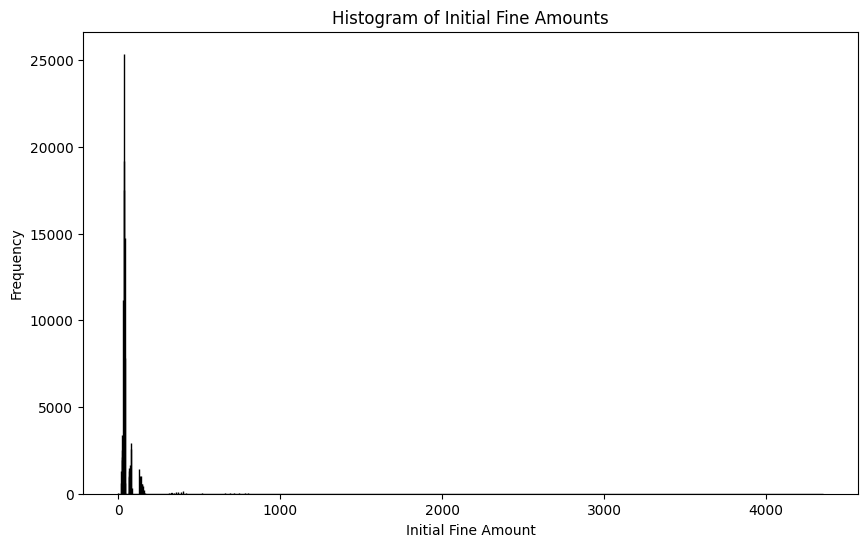

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(case_log['initial_fine_amount'], bins='auto', edgecolor='black')
plt.title('Histogram of Initial Fine Amounts')
plt.xlabel('Initial Fine Amount')
plt.ylabel('Frequency')
plt.show()

3b) Briefly describe the distribution that you see in the histogram.

There are three columns which show that the initial fine amount is under 1000. The count of these columns varies. The count of initial fine amount under 1000 is above 140'000. There we can observe that the initial fine amount is from zero to approx. 250. The other two columns are less in count but have a higher initial fine amount. From this histogram we can conclude that there exist more initial fine amount in count but the amount is not high. High fine amount are less in count.

In [31]:
# Ensure sorting by case and timestamp before calculating the final outstanding balance
df = df.sort_values(by=['case:concept:name', 'time:timestamp'])
# do a final oustanding balance column
df['final_outstanding_balance'] = df['outstanding_balance'].fillna(method='ffill')
#final_outstanding_balance = case_df.log[:,'final_outstanding_balance'].df.groupby('case:concept:name')['paymentAmount'].cumsum()

# Get the final outstanding balance per case (from the last event in each case)
final_outstanding_balance = df.groupby('case:concept:name')['final_outstanding_balance'].last().reset_index()

# Merge final outstanding balance into the case log
case_log = pd.merge(case_log, final_outstanding_balance, on='case:concept:name')

# Display the case log with the new final outstanding balance column
case_log.head()


/var/folders/gg/w_x4b_tx7tqgntjvzj6vzb4w0000gn/T/ipykernel_49378/2010655874.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['final_outstanding_balance'] = df['outstanding_balance'].fillna(method='ffill')


,case:concept:name,start_time,end_time,number_of_events,initial_fine_amount,final_outstanding_balance
0,A1,2006-07-24 00:00:00+00:00,2006-12-05 00:00:00+00:00,2,35.0,46.0
1,A100,2006-08-02 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,35.0,117.5
2,A10000,2007-03-09 00:00:00+00:00,2008-09-09 00:00:00+00:00,5,36.0,36.0
3,A10001,2007-03-19 00:00:00+00:00,2007-09-24 00:00:00+00:00,6,36.0,123.0
4,A10004,2007-03-20 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,36.0,123.0


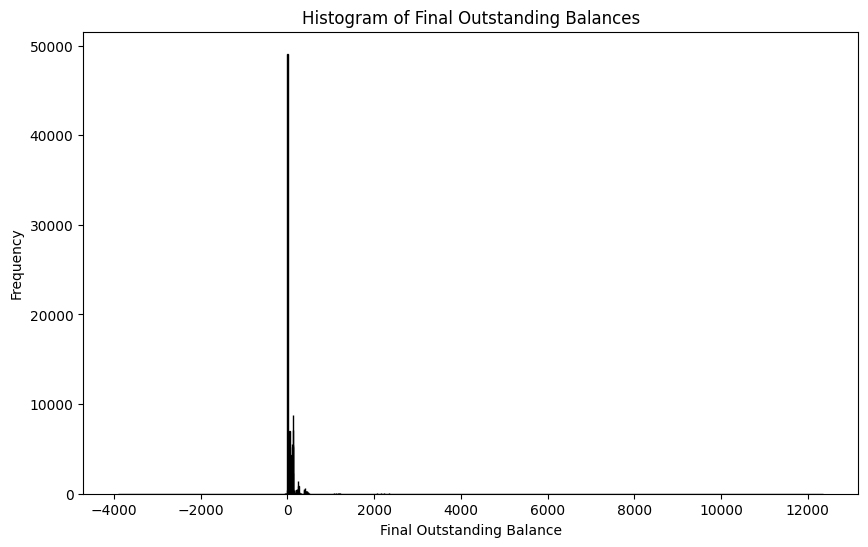

column: case:concept:name
case:concept:name
A1         1
S152611    1
S152574    1
S152576    1
S152577    1
          ..
N57495     1
N57496     1
N57497     1
N57498     1
V9999      1
Name: count, Length: 150370, dtype: int64


column: start_time
start_time
2002-07-07 00:00:00+00:00    232
2005-07-17 00:00:00+00:00    228
2000-07-23 00:00:00+00:00    212
2002-07-21 00:00:00+00:00    203
2004-07-18 00:00:00+00:00    199
                            ... 
2012-11-22 00:00:00+00:00      1
2003-01-19 00:00:00+00:00      1
2012-12-29 00:00:00+00:00      1
2002-10-27 00:00:00+00:00      1
2004-12-25 00:00:00+00:00      1
Name: count, Length: 4819, dtype: int64


column: end_time
end_time
2002-04-10 00:00:00+00:00    9153
2009-03-30 00:00:00+00:00    8873
2012-03-26 00:00:00+00:00    6928
2003-01-10 00:00:00+00:00    6281
2010-10-15 00:00:00+00:00    5111
                             ... 
2011-06-11 00:00:00+00:00       1
2006-02-26 00:00:00+00:00       1
2010-11-21 00:00:00+00:00       1
20

,case:concept:name,start_time,end_time,number_of_events,initial_fine_amount,final_outstanding_balance
0,A1,2006-07-24 00:00:00+00:00,2006-12-05 00:00:00+00:00,2,35.0,46.00
1,A100,2006-08-02 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,35.0,117.50
2,A10000,2007-03-09 00:00:00+00:00,2008-09-09 00:00:00+00:00,5,36.0,36.00
3,A10001,2007-03-19 00:00:00+00:00,2007-09-24 00:00:00+00:00,6,36.0,123.00
4,A10004,2007-03-20 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,36.0,123.00
...,...,...,...,...,...,...
150365,V9995,2002-09-07 00:00:00+00:00,2004-01-10 00:00:00+00:00,5,131.0,408.16
150366,V9996,2002-09-07 00:00:00+00:00,2002-11-06 00:00:00+00:00,3,131.0,-5.16
150367,V9997,2002-09-07 00:00:00+00:00,2004-01-10 00:00:00+00:00,5,131.0,408.16
150368,V9998,2002-09-07 00:00:00+00:00,2004-01-10 00:00:00+00:00,5,131.0,403.00


In [32]:
# Plotting the histogram of final outstanding balances
plt.figure(figsize=(10, 6))
plt.hist(case_log['final_outstanding_balance'], bins='auto', edgecolor='black')
plt.title('Histogram of Final Outstanding Balances')
plt.xlabel('Final Outstanding Balance')
plt.ylabel('Frequency')
plt.show()
for column in case_log.columns:
    print(f"column: {column}")
    print(case_log[column].value_counts())
    print("\n")

display(case_log.head(500000))

## Task 4
Add a variable to the case log that represents the final outstanding balance. Plot a histogram for final outstanding balance. Reflect the result.

The highest count in final outstanding balance is unter 140'000. The final oustanding balance is a negative number. Then we have under 20'000 count between 0-2000 final outstanding balance.
We can observe that this data has more negative final outstanding balance than positive.

In [33]:
# Boolean feature: case dismissed (assuming 'dismissal' column exists)
case_log['is_dismissed'] = df.groupby('case:concept:name')['dismissal'].last().fillna(False)

# Boolean feature: fully paid (if outstanding balance is zero)
case_log['is_fully_paid'] = case_log['final_outstanding_balance'] == 0

# Boolean feature: sent to credit collection (assuming 'notificationType' is used for credit collection)
case_log['is_sent_to_credit_collection'] = df.groupby('case:concept:name')['notificationType'].apply(lambda x: x.str.contains('credit_collection').any())

# Display the updated case log
case_log.head()


,case:concept:name,start_time,end_time,number_of_events,initial_fine_amount,final_outstanding_balance,is_dismissed,is_fully_paid,is_sent_to_credit_collection
0,A1,2006-07-24 00:00:00+00:00,2006-12-05 00:00:00+00:00,2,35.0,46.0,NaN,False,NaN
1,A100,2006-08-02 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,35.0,117.5,NaN,False,NaN
2,A10000,2007-03-09 00:00:00+00:00,2008-09-09 00:00:00+00:00,5,36.0,36.0,NaN,False,NaN
3,A10001,2007-03-19 00:00:00+00:00,2007-09-24 00:00:00+00:00,6,36.0,123.0,NaN,False,NaN
4,A10004,2007-03-20 00:00:00+00:00,2009-03-30 00:00:00+00:00,5,36.0,123.0,NaN,False,NaN


## Task 5
Add boolean features to the case log that represent whether a case is dismissed, fully paid, or sent to credit
collection, respectively.

a) Draw an upset plot to show the relationships between these outcomes.

b) Reflect the results.

First bar: 
This bar represents cases where only the is_fully_paid feature is true. In other words, these are cases where the fine was fully paid but the case was neither dismissed nor sent to credit collection.
This indicates that the majority of cases were fully paid and no further actions (dismissal or credit collection) were necessary.

Second bar:
This bar represents cases where none of the features are true (all gray dots), meaning these cases were:
Not fully paid,
Not dismissed,
Not sent to credit collection.
These cases are likely still unresolved or in a pending state.

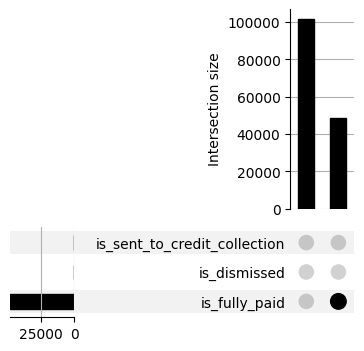

In [34]:
from upsetplot import UpSet

# Fill NaN values with False and then convert to integers
case_outcomes = case_log[['is_dismissed', 'is_fully_paid', 'is_sent_to_credit_collection']].fillna(False).astype(int)

# Prepare data for the upset plot
upset_data = case_outcomes.value_counts()

# Create the UpSet plot
UpSet(upset_data).plot()
plt.show()



## Task 6
Draw a scatter plot relating, for each case, the initial fine amount and the final outstanding balance. Which patterns do you see?

The majority of cases involve relatively small fines, typically under 2000 units, and their final outstanding balances tend to remain low. However, a small number of cases show much higher outstanding balances, despite the initial fines being comparatively low, which could indicate non-payment or the accumulation of additional charges. Additionally, there are instances of negative balances, which likely point to overpayments, refunds, or adjustments made to the original amount owed.

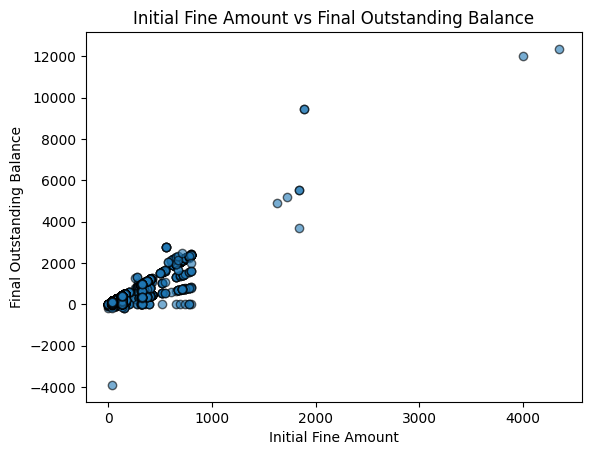

In [35]:
# Scatter plot of initial fine amount vs final outstanding balance
plt.scatter(case_log['initial_fine_amount'], case_log['final_outstanding_balance'], alpha=0.6, edgecolor='black')

# Adding labels and title
plt.title('Initial Fine Amount vs Final Outstanding Balance')
plt.xlabel('Initial Fine Amount')
plt.ylabel('Final Outstanding Balance')

# Show the plot
plt.show()


In [36]:
# Group by dismissal to see how many cases were dismissed vs not dismissed
dismissal_summary = df.groupby('dismissal').size()

# Print the summary
print(dismissal_summary)


dismissal
#        1980
$           2
2           2
3           3
4           2
5          10
@           9
A         213
B           2
C          10
D          36
E           7
F           4
G          93
I          29
J           1
K           3
M           5
N          28
NIL    152484
Q           1
R           4
T         111
U          11
V          10
Z           6
dtype: int64


## Task 7
Find at least one noteworthy fact about the distribution (or a relationship) for any of the following features:
org:resource, dismissal, article, points, or expense. 

The dismissals are categorized in letters. We can see that # and NIL have the most dismissals. And A has also 213 dismissals. These categories show the most dismissals. 

# Session 3

## Part 1 (Discovery)

### 1. Inspect the four most frequent sequential variants in Disco.



a) Summarize each of them in one sentence. Reflect your inspection: Does any of the four variants show behaviour that is unexpected to you? If yes, briefly explain why it is unexpected.

    Variant 1: This start with create fine, send fine, insert fine notation, add penalty and end with send for credit collection. After 2 years the credit collection is sent. And after the fine was created 132 days went by until the fine is sent. Typically, one might expect a more prompt follow-up after adding the penalty, given that this seems to be part of an escalation process. This delay stands out as a potential inefficiency in the system.

    Variant 2: This variant is simple which contains of create fine and payment, and it is done within 1 day.

    Variant 3: This variant is simple as well which contains of create fine and send fine. In these cases where the fine is sent it usually takes longer to process
    
    Variant 4: Starts with create fine then send fine, insert fine notation, add penalty and payment. This goes 1 year and 184 days. 


b) What percentage of cases is covered by the set of these four variants?
    
    Variant 1: 37.56%
    Variant 2: 30.84%
    Variant 3: 13.56%
    Variant 4: 6.33%

c) Use a filter to create a process map (a.k.a. DFG) with maximal detail (sliders at 100%) that covers only these four variants. Include a png file of that process map in your notebook.

    ![alt text](<Bildschirmfoto 2024-10-20 um 20.32.50.png>)



### 2. Remove any active filters from task 1. Inspect the process map with absolute frequency.


a) Play with the sliders. Write down at least three observations (either related to the existence of a transition (i.e., graph edge) or related to the frequency count) that are unexpected to you and hence you would suggest them to be further investigated. Explain briefly why.
    
    In absolute frequency there are 132'758 cases for creating a fine and 86'387 of them are send and 20'385 cases are then closed. The remaining cases go to insert fine notification, then to add penalty and send for credit collection. Some of the cases go along until send for credit collection.

    The maximum repition is 1 in every state. That means in this process there are no repitions.

    The case coverage of the process create fine is 100% that means, that every case has a create fine. 65% of the cases contain a send fine in the process. 49.7% include insert fine notification and add penalty to the process. And send for credit collection is up to 42.5% of the cases which completes the process. 


b)Use a filter to find a sequential variant that is not in the top 4 and that exhibits an unexpected transition. Report the variant as a sequence of activities.

    Variant 17: The activities sequence is the following: create fine, send fine, insert fine notification, appeal to judge, add penalty and send for credit collection. 

c) Inspect a case of the variant reported in b). Can you come up with an explanation for the unexpected transition?
    
    There is also a appeal to judge which typically refers to a formal request made by the fined individual or entity to challenge the fine or dispute its validity.

## Part 2 (Rework Analysis, BPMN)

### 3. Do a rework analysis.


a) Which activities occur more than once in a case?
    
    TBD

b) For each such activity, how many cases exhibit repetition?
    
    TBD

c) For one repeating activity, if existent, inspect a case with exactly 2 occurrences of that activity and, if existent, a case with 5 or more occurrences of that activity. For each of the two cases, report the case id and explain the repetition.
    
    TBD

### 4. Create a BPMN model that reflects your current (preliminary) understanding of how the process should behave (You might have seen behavior in the log that does not comply with that understanding. That is fine.) Use bpmn.io to create a bpmn file and a svg file, start from the template provided in Canvas, which contains all log activities. Make sure that your model contains all these activities and that it is a sound workflow graph.


    ![alt text](../../../Downloads/diagram.svg)

## Part 3 (Process Induction)

### 5. Generate a BPMN (or Petri Net) model from the event log using the pm4py inductive miner. Write down two traces (i.e., sequence of activities) of the generated model that describe behaviour that you do not expect from the process and that are therefore not traces of your model from task 4.

    tbd

# 4 Session (Load Analysis)

## Part 1

1. Inspect, in Disco, the charts Statistics | Overview | Events over time and Statistics | Overview | Active cases over time. Describe, for each chart, briefly your most striking observation. Write down, for each chart, a resulting
question for further investigation.

        For "Events over time":
        Observation: There is a recurring peak in events at the end of each month, with more events occurring at the end compared to the beginning.
        Question: Why do we observe a spike in events at the end of each month? Is there a particular deadline or trigger causing a surge in activity during this time?

        For "Active cases over time":
        Observation: The number of active cases is consistently high each day, with a rise at the end of the month followed by a drop at the beginning of the next month. The chart spans across a year.
        Question: What process factors or external influences are causing the rise and subsequent drop in active cases at the end and beginning of each month? Are there recurring process steps that lead to this pattern?


2. Study the distribution of case arrivals over the days of the year 2000. What patterns do you see?

        There is a strong rise in the case arrivals over the year 2000. In November there is a small decrease but then it increases again. 

3. Study the distribution of case arrivals for each calendar month of the log. Do you see any drift or outliers
comparing the different years of the log?

        Observation:
        There are abrupt decreases in case arrivals during the months of March/April. Additionally, the beginning of some years also shows a noticeable decrease in case arrivals.


4. Draw a dotted chart for the first 110 arriving cases of the log in the order of their arrival. Write down at least
two interesting observations.

        In the beginning of 2000 there were a lot of files created, then in February the fines were sent and in April send for credit collection went out.

5. Investigate absolute time distribution for Send for Credit Collection and Send Fine. Briefly describe and interpret the results.

In [39]:
import plotly.express as px
import pandas as pd
import sys

# Append the directory to sys.path
sys.path.append('/Users/Fulya/Desktop/Uni/Process Mining/')

from event_enricher_v2 import create_case_log, event_add_ordered_case_id

# Assuming 'df' is defined earlier in your code
case_log = create_case_log(df)
event_log = event_add_ordered_case_id(df, case_log)

# Filter the case log and take the first 110 cases
filtered_case_log = case_log.sort_values(by='start_time').head(110)
filtered_event_log = event_log[event_log['case:concept:name'].isin(filtered_case_log.index)]

# Ensure that 'time:timestamp' is in datetime format if not already
filtered_event_log['time:timestamp'] = pd.to_datetime(filtered_event_log['time:timestamp'])

# Create the dotted chart
fig = px.scatter(
    filtered_event_log,
    x='time:timestamp',
    y='ordered_case_id',
    color='concept:name',
    title='Dotted Chart of the First 110 Arriving Cases',
    labels={'time:timestamp': 'Time', 'ordered_case_id': 'Ordered Case ID'},
    height=500
)

# Update layout
fig.update_yaxes(categoryorder='category ascending')
fig.update_layout(title='Dotted Chart of the First 110 Arriving Cases', xaxis_title='Time', yaxis_title='Ordered Case ID')

# Show the figure
fig.show()


ModuleNotFoundError: No module named 'event_enricher_v2'

## Part 2 (Load Analysis)

6. Study case duration such that you can see the characteristics of the distribution for each outcome separately. Write down a notable
observation of the distribution for each outcome. Most of the cases go up to 24 days. There are some cases which are processing up to 1 or 2 years. The shorter duration of a case leads to completed cases. The cases which have a longer duration are more complicated and can involve the judge.


7. Consider the following two subprocesses given as sequences of activities:

‒ S1 = ['Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection'] and

‒ S2 = ['Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture', 'Notify Result Appeal to Offender']

Study the distribution of the delay between each pair of subsequent activities in a sequence, e.g., by plotting a histogram, i.e., 4 distributions for
S1 and 3 distributions for S2.
a) Write down at least one interesting observation for each distribution.

    The delay in first distribution is more than in the second distribution but in the second distribution there is up to more hours but a few cases distributed.


b) Which of the subprocess steps seems to be automated?

    The first distribution seems automated because the delay hours are less than the second distribution.

c) Which of the subprocess steps should be automated? Argue briefly why.

    With the create fine the notification should be send directly to avoid delay time and if the fine is not paid it can be notified again if the fine is not paid for the second time it should then go to add penalty.

d) The Italian law prescribes a deadline by when the Send Fine letter has to be sent. There is a deadline for letters sent to offenders living in Italy and another deadline for those living abroad. Assuming that, in the vast majority of cases, the letter is sent within Italy, what deadline does the histogram suggest existed for these cases? Briefly argue why.

    TBD
    
e) What is the median transit time for the Send Fine letter?

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import sys

# Sample event log data structure (to be replaced with actual data)
data = {
    'case:concept:name': ['A1', 'A2', 'A4', 'A5'],
    'concept:name': [
        'Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection',
        'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture', 'Notify Result Appeal to Offender'
    ],
    'time:timestamp': [
        '2024-01-01 09:00:00', '2024-01-02 10:00:00', '2024-01-03 12:00:00', '2024-01-04 14:00:00', '2024-01-05 16:00:00',
        '2024-01-01 09:00:00', '2024-01-02 10:30:00', '2024-01-03 11:00:00', '2024-01-03 11:30:00'
    ]
}

# Create a DataFrame
event_log = pd.DataFrame(df)

# Convert 'time:timestamp' to datetime
event_log['time:timestamp'] = pd.to_datetime(event_log['time:timestamp'])

# Calculate delays for each case
event_log = event_log.sort_values(by=['case:concept:name', 'time:timestamp'])
event_log['delay'] = event_log.groupby('case:concept:name')['time:timestamp'].diff().dt.total_seconds() / 3600  # Convert delay to hours

# Split into subprocesses
S1 = ['Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection']
S2 = ['Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture', 'Notify Result Appeal to Offender']

# Filter delays for S1 and S2
delays_S1 = event_log[event_log['concept:name'].isin(S1)]['delay'].dropna()
delays_S2 = event_log[event_log['concept:name'].isin(S2)]['delay'].dropna()

# Plot histograms for delays in S1
fig_S1 = px.histogram(delays_S1, nbins=10, title='Delay Distributions for S1 Activities', labels={'value': 'Delay (Hours)'})
fig_S1.show()

# Plot histograms for delays in S2
fig_S2 = px.histogram(delays_S2, nbins=10, title='Delay Distributions for S2 Activities', labels={'value': 'Delay (Hours)'})
fig_S2.show()
#median_transit_time = delays_S1[delays_S1.index[delays_S1['concept:name'] == 'Send Fine']].median()
#print("Median Transit Time for Send Fine Letter:", median_transit_time, "hours")



# Session 5

## Part 1

### 1. Check the following rules using Declare constraints. Reflect the result. If violated, give the case id of a violating case, inspect and interpret the violation of that case.

a) Insert Fine Notification is always followed by Add penalty.
    
    There is a case (A10619) where insert fine notification is followed by insert data appeal to prefecture. This shows the process moving into a legal dispute phase, possibly indicating disagreement with the fine or its terms. 

b)Insert Date Appeal to Prefecture is always preceded by Send Fine.

    True

c) Payment and Send for Credit Collection do not occur together in a case.

    Case V11790 shows that payment and send for credit collection occur together. Here the process is set up as the following: create fine, send fine, insert fine notification, insert data appeal to prefecture, send appeal to prefecture, add penalty, receive result appeal from prefecture, notify results appeal to offender, payment, payment and finally send for credit collection. 

    The payment was either incomplete, late, or not fully registered in the system before the case was sent for credit collection.

    There might have been a technical or administrative delay in recognizing the payment, causing the system to trigger credit collection procedures.

    Alternatively, the payment may have been part of a larger issue, such as partial fulfillment or special handling due to the outcome of the appeal process.

### 2. Choose another Declare constraint that you expect to be satisfied and check it. Reflect the result.

    Constraint: After creating the fine the following step is always send fine.

    This constraint does not hold with the case A12260. After creating the fine the payment is made. And after the payment the send fine comes along. 

## Part 2

3. Reconsider the BPMN model you created in Task 3.4. Find a sequential variant of the log which is not a trace of the
BPMN model. You can do this either manually or using a conformance checker in either pm4py, Celonis, or Apromore.
a) Report the variant.
b) Make a brief statement whether you consider the behavior in the variant expected or unexpected and why.
i. If the variant is expected, describe textually how the BPMN model should be updated to allow the variant.
ii. If the variant is unexpected, make sure you have not reported the unexpected behaviour in one of the previous
tasks, otherwise find another variant. Inspect a case of the variant and interpret the unexpected behavior.
4. Check the log’s conformance with the following two statements in your notebook using enrichments where necessary. If
the log does not conform perfectly, report the number of violating cases and the fuzzy truth value on the case log, name
the id of at least one violating case, inspect that case and interpret the violation of that case.
a) For each event of a case holds: If the outstanding balance after the event is 0 or less, then there is no further event.
b) An appeal to the prefecture must be raised 60 days after Insert Fine Notification or earlier.

# Session 6

## Part 1


1.) Consider the outcome that a case is not credit collected and consider the explanation that if the police does not send the fine letter within the deadline required by law, then they do not send the case for credit collection. (For the deadline, cf. Task 4.7.d, you may either consider the deadline for offenders living in Italy or the deadline for offenders living abroad, which we assume to be 360 days.) Evaluate precision and recalled cases for the explanation and state the number of false positives.

2.) Note that all cases of the sequential variant ['Create Fine', 'Send Fine'] are unresolved as there is no Payment, no Send for Credit Collection, and no appeal.

a) Check precision and recalled cases of the explanation "the case if of this variant" for the outcome "not credit collected".

b) Revisit the set of dismissal values that occur in the log and consider the explanation that cases of this variant have been dismissed with some dismissal value other than '#' or 'G'. What is a maximal set of dismissal values that explain the outcome "a case is of the variant ['Create Fine', 'Send Fine']" with precision 1.0?
Calculate how many cases are recalled by that explanation.

## Part 2


3.) Let's assume that all cases of the ['Create Fine', 'Send Fine'] have the outcome "early dismissal", i.e., we assume that in the cases of this variant without a dismissal code, the dismissal code might have been forgotten to be inserted.

a) Set up rule induction in a separate notebook for the outcome "not credit collected". Generate a rich case log using brute-force enrichment. Configure the rule induction such that fully paid and dismissed cases, including "early dismissal" cases are already explained. Run rule induction.

b) Find at least two additional explanations why cases are not credit collected such that the precision is 0.95 or higher and there are 200 or more recalled cases for each explanation. You are free in using any combination of techniques for finding explanations. In particular, you can use any previous insights and any additional enrichments (hint: represent whether the penalty has (not) been paid). For each explanation that you find, include the following in your main notebook: (i) calculation of precision and recalled cases; (ii) a brief description why you consider the explanation meaningful. (Make sure that the explanation is not trivial); (iii) Describe briefly how you obtained the explanation. Furthermore, list any hypotheses that you have evaluated but did not turn out to be good explanations. Try to keep your rule induction notebook tidy as you will be asked to also submit it.

4.) Pick one of your open questions from your analytics lists. Make sure it is still open. Try to answer it using any techniques. (If you do not have an open question or if you do not know how to approach this task, then consider the following open question: Why do some cases that have a Send Appeal to Prefecture do not also have a Receive Result Appeal from Prefecture? -- and try to find an explanation.) Include in the main notebook the following: 

(i) the open question you addressed, 

(ii) the results you obtained if any, including any charts or calculations that show the validity of results, 

(iii) a brief description of what you did (only if you do not include these steps explicitly in the main notebook).